<a href="https://colab.research.google.com/github/NOVLESH/test/blob/master/Copy_of_RESCASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [23]:


df = pd.read_csv('/content/solarpredicted.csv',index_col=0)

X = df.drop(["Radiation", "TimeSunRise", "TimeSunSet", "Data", "Time"], axis=1)
y = df["Radiation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head(20)


,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,
1475402124,10-01-2022,23:55:24,1.27,50,30.46,101,150.11,4.50,06:13:00,18:11:00
1475401821,10-01-2022,23:50:21,1.28,50,30.46,101,124.45,2.25,06:13:00,18:11:00
1475401523,10-01-2022,23:45:23,1.26,50,30.47,101,119.92,9.00,06:13:00,18:11:00
1475401225,10-01-2022,23:40:25,1.27,51,30.46,101,132.30,7.87,06:13:00,18:11:00
1475400919,10-01-2022,23:35:19,1.30,51,30.46,102,130.24,6.75,06:13:00,18:11:00
1475400621,10-01-2022,23:30:21,1.28,51,30.47,102,144.72,5.62,06:13:00,18:11:00
1475400322,10-01-2022,23:25:22,1.28,51,30.46,102,144.15,4.50,06:13:00,18:11:00
1475400024,10-01-2022,23:20:24,1.28,51,30.47,102,159.72,10.12,06:13:00,18:11:00
1475399726,10-01-2022,23:15:26,1.27,51,30.47,102,111.49,9.00,06:13:00,18:11:00


In [15]:
df.dtypes

Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(5,)),
    Dense(32, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_train_scaled, y_train, epochs=120, batch_size=32, verbose=0)


In [18]:
svm = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=.1)
svm.fit(X_train_scaled, y_train)


SVR(C=100, gamma=0.1)

In [19]:
y_pred_nn = model.predict(X_test_scaled).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)

y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)


205/205 [==============================] - 0s 1ms/step


In [20]:





print("MSE (NN):", mse_nn)
print("MSE (SVM):", mse_svm)

sample = X_test_scaled[0].reshape(1, -1)
print("Actual radiation:", y_test.iloc[0])
print("Predicted radiation (NN):", model.predict(sample).squeeze())
print("Predicted radiation (SVM):", svm.predict(sample).squeeze())




MSE (NN): 31179.4622956641
MSE (SVM): 40721.37710136663
Actual radiation: 749.03
1/1 [==============================] - 0s 28ms/step
Predicted radiation (NN): 570.09534
Predicted radiation (SVM): 323.90790761543985


205/205 [==============================] - 1s 2ms/step


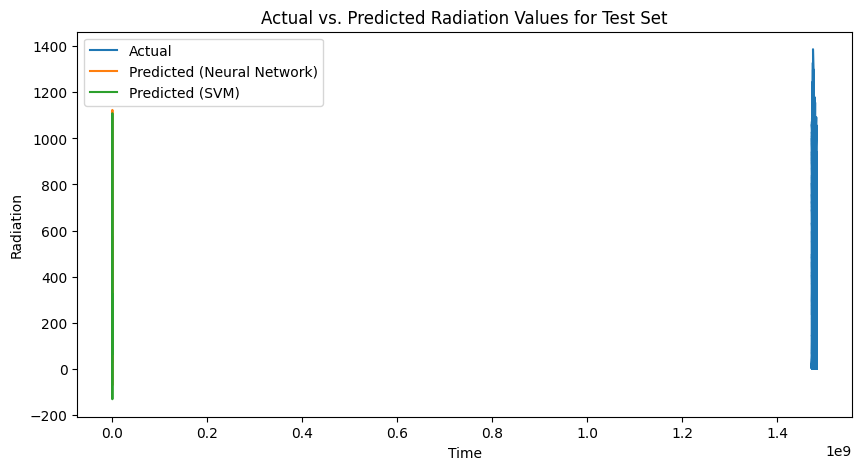

In [24]:
import matplotlib.pyplot as plt

# Get the predicted values for the test set using the neural network and SVM models
y_pred_nn = model.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Plot the actual and predicted values using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual")  # Plot the actual values as a line
plt.plot(y_pred_nn, label="Predicted (Neural Network)")  # Plot the predicted values for the neural network model as a line
plt.plot(y_pred_svm, label="Predicted (SVM)")  # Plot the predicted values for the SVM model as a line
plt.xlabel("Time")
plt.ylabel("Radiation")
plt.legend()  # Add a legend to the plot
plt.title("Actual vs. Predicted Radiation Values for Test Set")  # Add a title to the plot
plt.show()  # Show the plot



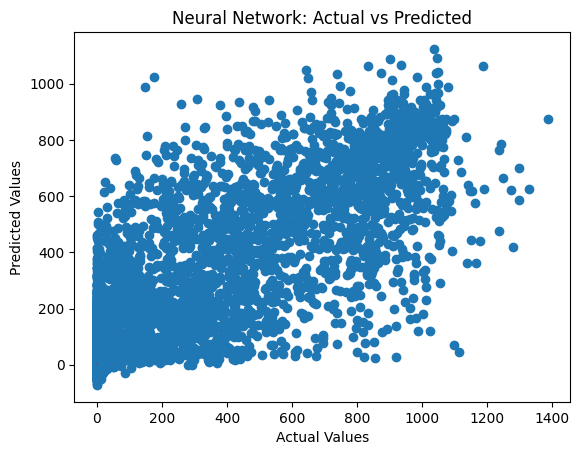

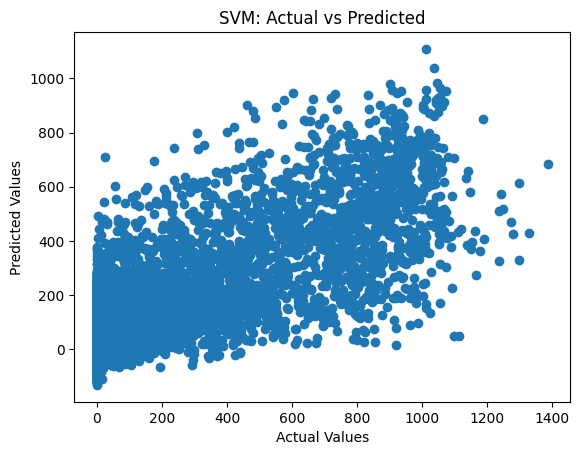

In [22]:
import matplotlib.pyplot as plt

# plot actual vs predicted values for neural network
plt.scatter(y_test, y_pred_nn)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network: Actual vs Predicted')
plt.show()

# plot actual vs predicted values for SVM
plt.scatter(y_test, y_pred_svm)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM: Actual vs Predicted')
plt.show()
